In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
"""pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)"""
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/glovetwitter27b50d/glove.twitter.27B.50d.txt
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
!pip install transformers


# Dataset and Details

In [3]:
true_news = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false_news = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [4]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
false_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_news['category'] = 1
false_news['category'] = 0

In [7]:
all_news = pd.concat([true_news, false_news])
all_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     21417 non-null  object
 1   text      21417 non-null  object
 2   subject   21417 non-null  object
 3   date      21417 non-null  object
 4   category  21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [9]:
true_news.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [10]:
false_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     23481 non-null  object
 1   text      23481 non-null  object
 2   subject   23481 non-null  object
 3   date      23481 non-null  object
 4   category  23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [11]:
false_news.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

Right now this class imbalance is not considered high skewed. After getting the results if I get not accurate results, I will consider some approaches for imbalance.

In [12]:
all_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
all_news.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [14]:
all_news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [15]:
all_news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
print(all_news.duplicated().sum())
all_news.drop_duplicates(inplace = True)

209


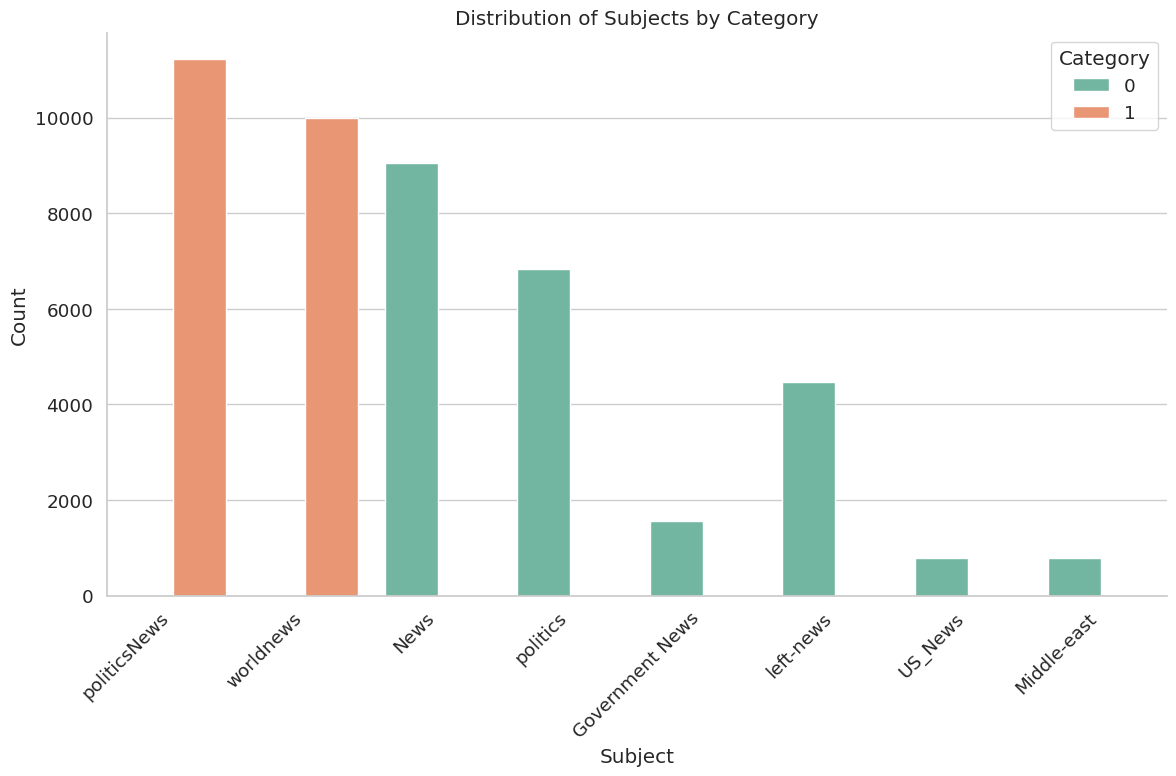

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale=1.2)
chart = sns.countplot(x="subject", hue="category", data=all_news, palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha="right")
chart.legend(title="Category", loc="upper right")

plt.title("Distribution of Subjects by Category")
plt.xlabel("Subject")
plt.ylabel("Count")

sns.despine()

plt.tight_layout()
plt.show()


In [18]:
all_news['text'] = all_news['title']+ "---" +  all_news['text'] 
del all_news['title']
del all_news['subject']
del all_news['date']

In [19]:
all_news.head()

,text,category
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


# Preprocess

In [20]:
import nltk
from nltk.corpus import stopwords
import string

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)



Cleaning


In [21]:
import re
from bs4 import BeautifulSoup
import requests  # Import the requests library
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


def strip_html(text):
    if text.startswith('http://') or text.startswith('https://'):
        response = requests.get(text)
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup.get_text()
    else:
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_stopwords(text):
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text



all_news['text'] = all_news['text'].apply(denoise_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipykernel_34/794439218.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [22]:
all_news.head()

,text,category
0,"U.S. budget fight looms, Republicans flip fisc...",1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much more' ...,1


# Wordcloud

True class

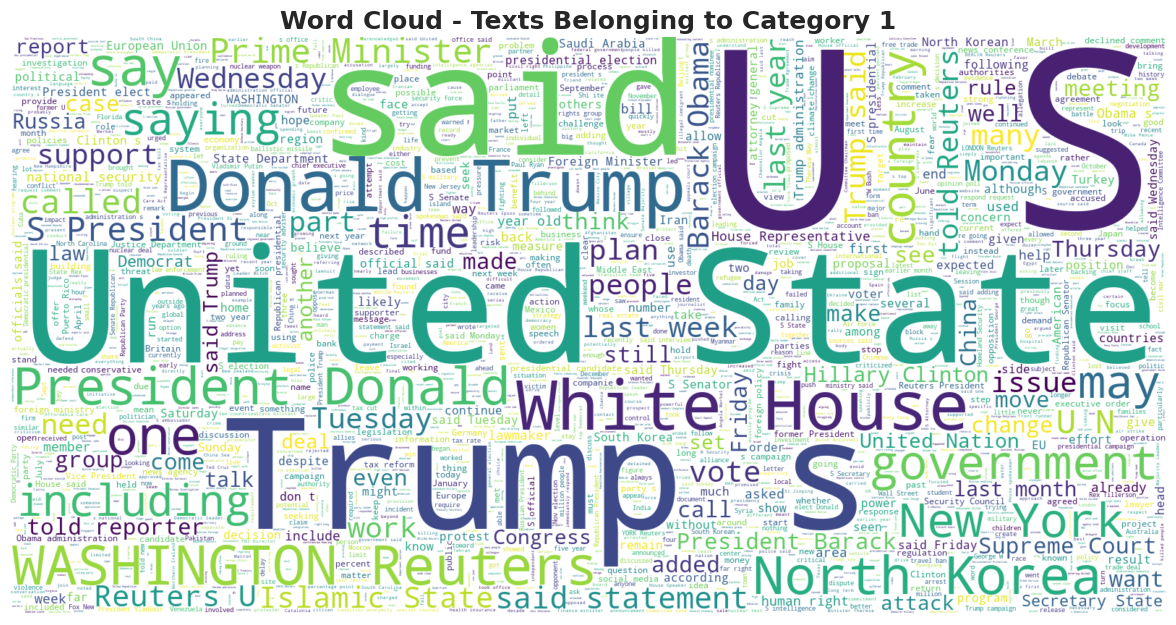

In [23]:
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt

# Filter the DataFrame to select only the texts belonging to the category "1"
texts = all_news[all_news.category == 1].text

# Create the WordCloud object with custom settings
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=800,
    stopwords=STOPWORDS,  
    background_color='white',
    colormap='viridis',
    random_state=42
).generate(" ".join(texts))

fig, ax = plt.subplots(figsize=(12, 8))

ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

ax.set_title("Word Cloud - Texts Belonging to Category 1", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()


Fake news

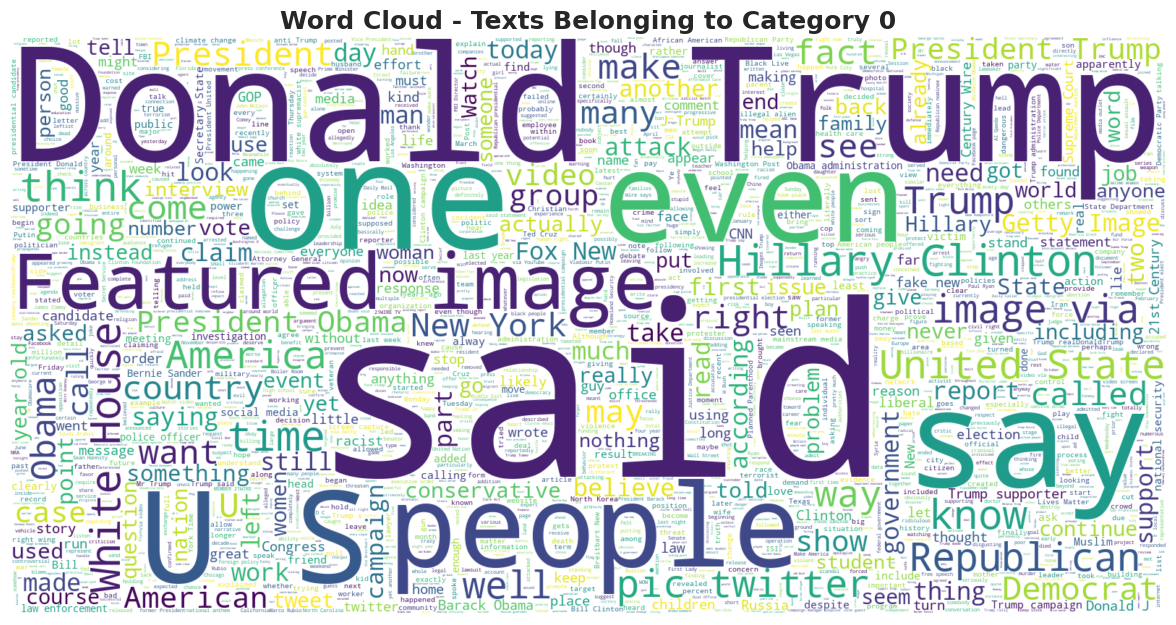

In [24]:

texts = all_news[all_news.category == 0].text

wc = WordCloud(
    max_words=2000,
    width=1600,
    height=800,
    stopwords=STOPWORDS,  
    background_color='white',
    colormap='viridis',
    random_state=42
).generate(" ".join(texts))

fig, ax = plt.subplots(figsize=(12, 8))

ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

ax.set_title("Word Cloud - Texts Belonging to Category 0", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()

distribution of average word lengths in two categories of text: "Original text" and "Fake text"

/tmp/ipykernel_34/2821300619.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_original, ax=ax1, color='red')
/tmp/ipykernel_34/2821300619.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_fake, ax=ax2, color='green')


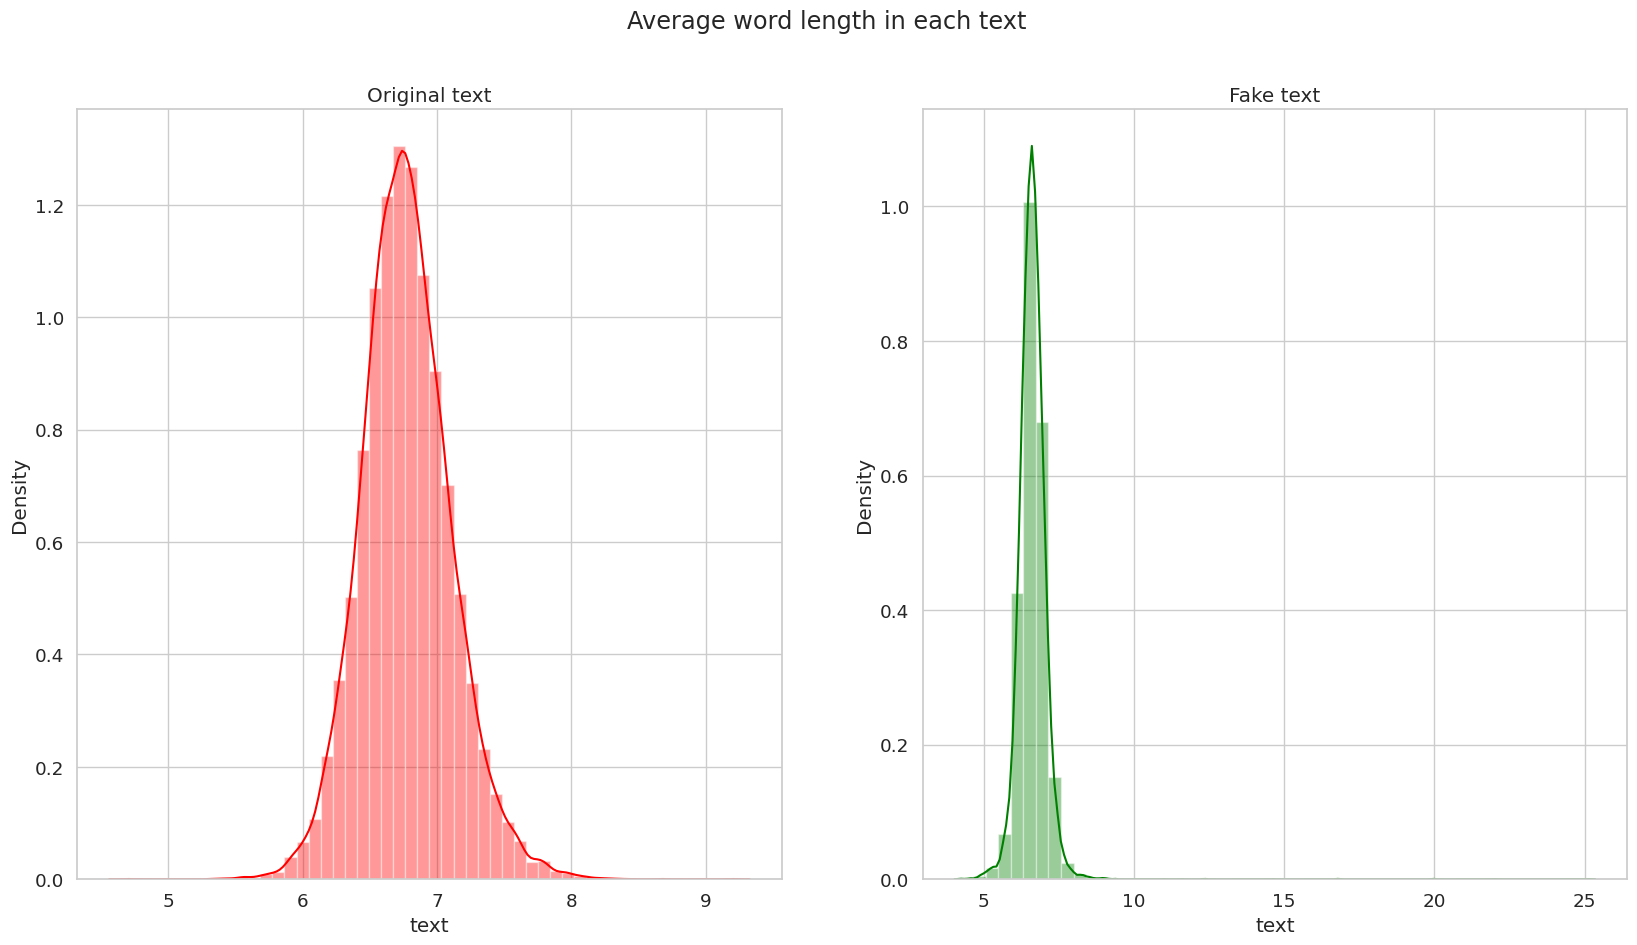

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

word_original = all_news[all_news['category'] == 1]['text'].str.split().apply(lambda x: np.mean([len(i) for i in x]))

sns.distplot(word_original, ax=ax1, color='red')
ax1.set_title('Original text')

# Extract word lengths for "Fake text" category
word_fake = all_news[all_news['category'] == 0]['text'].str.split().apply(lambda x: np.mean([len(i) for i in x]))

sns.distplot(word_fake, ax=ax2, color='green')
ax2.set_title('Fake text')

fig.suptitle('Average word length in each text')

plt.show()


In [26]:
max_len_original = np.max(word_original)
min_len_original = np.min(word_original)

max_len_fake = np.max(word_fake)
min_len_fake = np.min(word_fake)

print("Original text - Maximum word length:", max_len_original)
print("Original text - Minimum word length:", min_len_original)

print("Fake text - Maximum word length:", max_len_fake)
print("Fake text - Minimum word length:", min_len_fake)


Original text - Maximum word length: 9.192307692307692
Original text - Minimum word length: 4.696153846153846
Fake text - Maximum word length: 25.153846153846153
Fake text - Minimum word length: 4.22737819025522


# Creating Corpus

In [27]:
from collections import Counter

corpus = all_news['text'].str.split().explode().tolist()
import re

pattern = r"[-]"

# Remove the hyphens from the corpus using regular expressions and filter out empty strings
corpus = [re.sub(pattern, "", word) for word in corpus if word.strip()]


word_counts = Counter(corpus)

print("First 10 words:")
print(corpus[:10])

most_common_words = word_counts.most_common(10)
print("\n10 most frequent words with their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

least_common_words = word_counts.most_common()[-10:]
print("\n10 least frequent words with their frequencies:")
for word, frequency in least_common_words:
    print(f"{word}: {frequency}")

First 10 words:
['U.S.', 'budget', 'fight', 'looms,', 'Republicans', 'flip', 'fiscal', 'scriptWASHINGTON', '(Reuters)', 'head']

10 most frequent words with their frequencies:
Trump: 110279
said: 92292
would: 54252
U.S.: 49883
people: 32958
President: 32746
also: 30125
one: 29248
Donald: 26613
said.: 25930

10 least frequent words with their frequencies:
grandmother.Last: 1
KEEP:: 1
Emanuel.Currently: 1
(regardless,: 1
scary).: 1
DUAL: 1
LOYALTIES:: 1
Mondoweiss,: 1
IDF.: 1
overdrive.READ: 1


Already showed unigrams, now it is time for bigrams and trigrams.

# Bigrams,Trigrams,FourgramsBigrams,Trigrams,Fourgrams

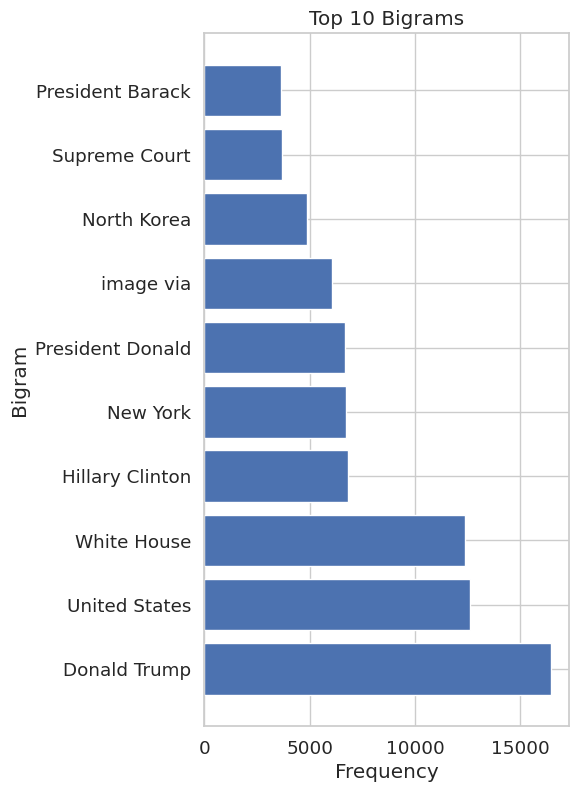

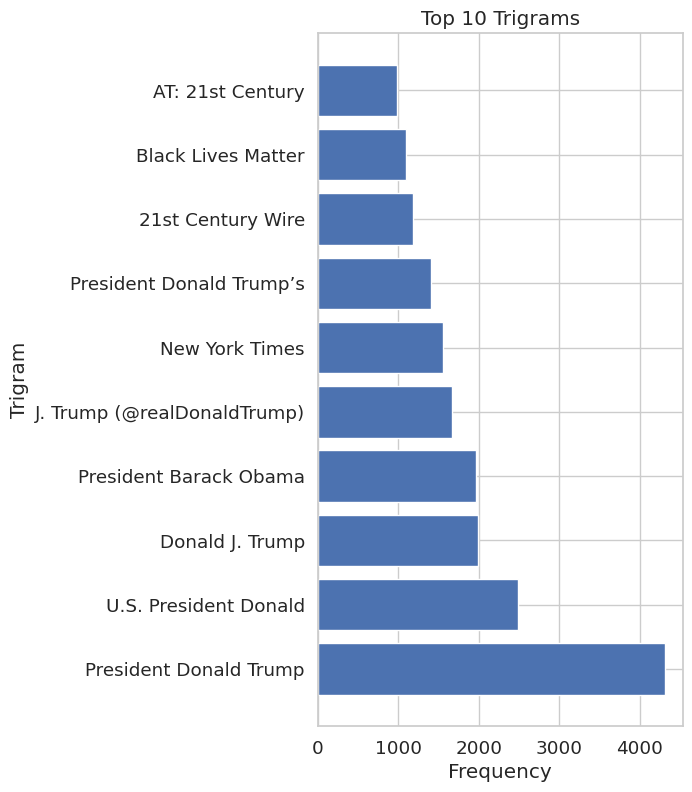

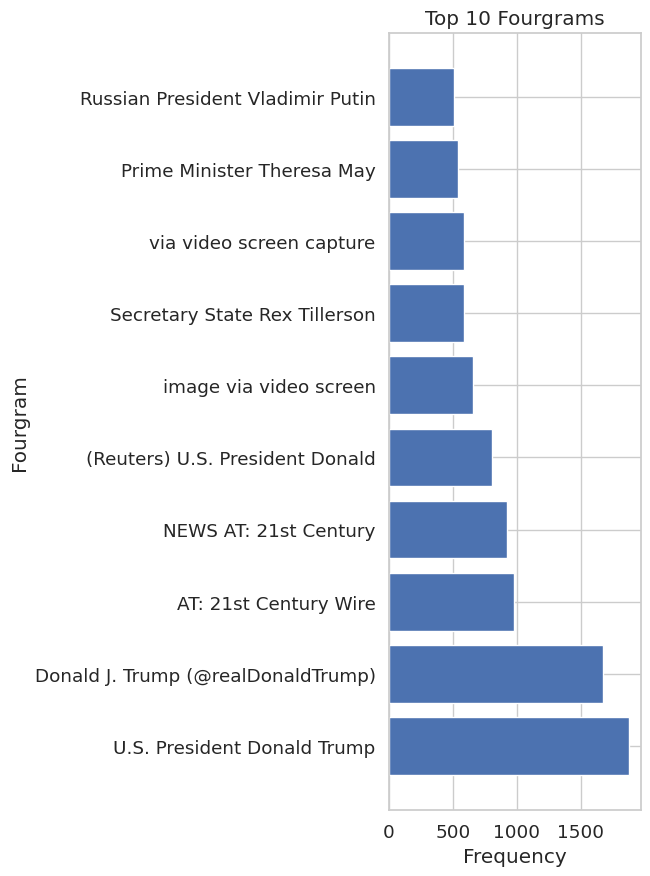

In [28]:
import matplotlib.pyplot as plt
from collections import Counter

def get_top_text_ngrams(corpus, n, g):
    all_ngrams = []
    for text in corpus:
        words = text.split()
        for i in range(len(words) - g + 1):
            ngram = " ".join(words[i:i+g])
            all_ngrams.append(ngram)
    
    ngram_counts = Counter(all_ngrams)
    top_ngrams = ngram_counts.most_common(n)
    
    return top_ngrams

plt.figure(figsize=(16, 9))

# Top 10 Bigrams
most_common_bi = get_top_text_ngrams(all_news.text, 10, 2)
most_common_bi = dict(most_common_bi)

labels = list(most_common_bi.keys())
values = list(most_common_bi.values())

plt.subplot(1, 3, 1)
plt.barh(range(len(labels)), values)
plt.yticks(range(len(labels)), labels)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 10 Bigrams')

# Top 10 Trigrams
most_common_tri = get_top_text_ngrams(all_news.text, 10, 3)
most_common_tri = dict(most_common_tri)

labels_tri = list(most_common_tri.keys())
values_tri = list(most_common_tri.values())

plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 2)
plt.barh(range(len(labels_tri)), values_tri)
plt.yticks(range(len(labels_tri)), labels_tri)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.title('Top 10 Trigrams')

# Top 10 Fourgrams
most_common_four = get_top_text_ngrams(all_news.text, 10, 4)
most_common_four = dict(most_common_four)

labels_four = list(most_common_four.keys())
values_four = list(most_common_four.values())

plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 3)
plt.barh(range(len(labels_four)), values_four)
plt.yticks(range(len(labels_four)), labels_four)
plt.xlabel('Frequency')
plt.ylabel('Fourgram')
plt.title('Top 10 Fourgrams')

plt.tight_layout()
plt.show()


# Train-Val-Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_news.text, all_news.category, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [30]:
x_train

12516    BLACK AMERICAN Became Republican: “If You’re V...
3747     State Department reminds staff ethics posts Tr...
9944     DC Park Police Raid Tear ‘Anti-Trump’ Camp Occ...
15779    Iraqi forces retake border crossing Syria Isla...
7228     Trust Fund Frat Bro Explodes Uber Driver Foul-...
                               ...                        
22040    Trump Thanks Putin Slashing US Embassy Staff: ...
8228     Biden asks U.S. Congress allow unencumbered Zi...
9196     SENATOR REVEALS Shocking FBI Corruption “Water...
14467    Hariri says clarify position Lebanese crisis r...
17218    “EVERYDAY AMERICAN”? U.S. TAXPAYERS PICK HUGE ...
Name: text, Length: 28600, dtype: object

In [31]:
x_val

20070    OFFENDING GLOBALISTS: Teen Kicked UN Building ...
19020    Trump says Puerto Rico trouble hurricane, debt...
7451     Report: Obama Says It’s Bernie, Time Unite Beh...
17411    LOW FLUSH TOILETS, DELTA SMELT, PAYOFFS, NEIGH...
19762    “I’m Her” REALLY Means Hillary Supporters ---*...
                               ...                        
11508    South Sudan rebels say army attacked signing c...
548      Trump meet congressional leaders next week leg...
4998     Obama lawyers move fast join fight Trump---WAS...
20960    EU executive raise pressure Poland Wednesday: ...
14208    NATIONAL ENQUIRER ENDORSED TRUMP…Then Dropped ...
Name: text, Length: 7151, dtype: object

In [32]:
x_test

18085    Merkel, Juncker discuss Catalan crisis: EU off...
18274    LIBERAL HACK KATIE COURIC Says Fake News “Tear...
15065    TRUMP RIGHT! Audit Reveals State Dept. Cyberse...
550      Clay Aiken Says ‘F*****g Dumbass’ Thinking Tru...
7599     U.S. militia girds trouble presidential electi...
                               ...                        
16475    U.S. lost trust South Sudan, Trump envoy tells...
6694     Ted Cruz Doesn’t Want Transgender People Pee U...
13802    Turkey says U.S. wants use gold trader case im...
11926    OBAMA PUNISHING Fiat-Chrysler 2,000 US Jobs, $...
9325     IN: Anchor #MattLauer Fired Decades NBC ---NBC...
Name: text, Length: 8938, dtype: object

In [33]:
print("Train set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)


Train set shape: (28600,)
Validation set shape: (7151,)
Test set shape: (8938,)


Number of unique tokens: 116982


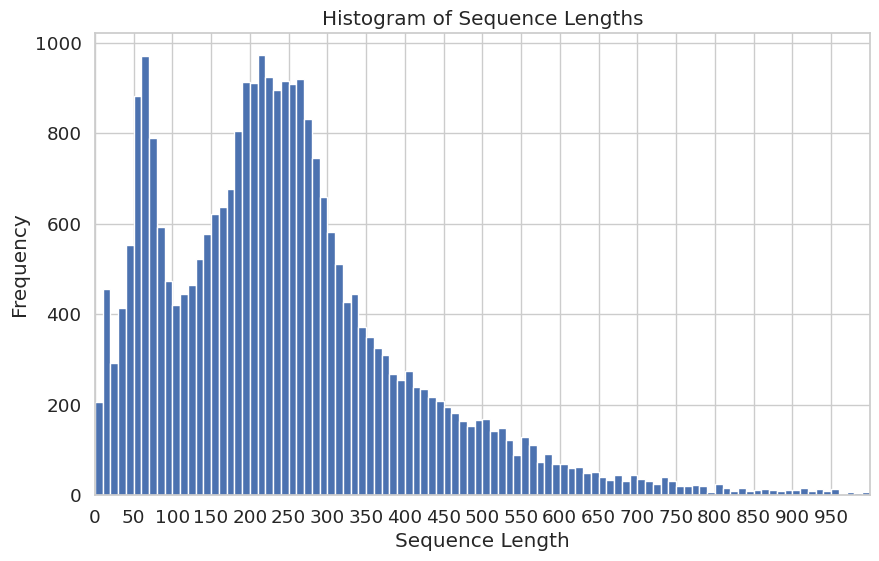

In [143]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)

num_unique_tokens = len(tokenizer.word_index)
print(f"Number of unique tokens: {num_unique_tokens}")


sequence_lengths = [len(seq) for seq in tokenized_train]

plt.figure(figsize=(10,6)) 
plt.hist(sequence_lengths, bins=100, range=(0,1000)) 
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sequence Lengths')

plt.xlim(0, 1000)


start, end = plt.xlim()
plt.xticks(np.arange(start, end, step=50)) 

plt.show()


# Based on the histogram, I choosed a maxlen value that covers most of the samples.


In [35]:
maxlen = 100 #For albert with less maxlen for computational reasons

Selecting max_features is a bit more nuanced. In general, the max_features parameter in the tokenizer refers to the maximum number of words to keep, based on the frequency of words. Only the most common max_features words will be kept.

In [36]:
num_unique_tokens = len(tokenizer.word_index)
print(f"Number of unique tokens: {num_unique_tokens}")


Number of unique tokens: 116982


 set max_features equal to num_unique_tokens, it means you're using all the words in your corpus to train your model.
 However, not all words are equally important. Some words might appear only a few times, and they might not contribute much to understanding the general sentiment of a text 
 
 

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


def create_model():
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


max_features_options = [15000, 20000,25000]

for max_features in max_features_options:
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(x_train)
    tokenized_train = tokenizer.texts_to_sequences(x_train)
    X_train = pad_sequences(tokenized_train, maxlen=maxlen)
    tokenized_test = tokenizer.texts_to_sequences(x_test)
    X_test = pad_sequences(tokenized_test, maxlen=maxlen)

    # Model creation
    model = create_model()

    # Model training
    model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

    # Model evaluation
    score, acc = model.evaluate(X_test, y_test, batch_size=32)
    print(f'Test score for max_features={max_features}: {score}')
    print(f'Test accuracy for max_features={max_features}: {acc}')


Epoch 1/5
894/894 [==============================] - 174s 190ms/step - loss: 0.1150 - accuracy: 0.9609 - val_loss: 0.0663 - val_accuracy: 0.9786
Epoch 2/5
894/894 [==============================] - 170s 190ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0484 - val_accuracy: 0.9855
Epoch 3/5
894/894 [==============================] - 172s 193ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 4/5
894/894 [==============================] - 173s 193ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0613 - val_accuracy: 0.9881
Epoch 5/5
280/280 [==============================] - 7s 26ms/step - loss: 0.0605 - accuracy: 0.9813
Test score for max_features=15000: 0.06054013594985008
Test accuracy for max_features=15000: 0.9813157320022583
Epoch 1/5
894/894 [==============================] - 182s 200ms/step - loss: 0.0760 - accuracy: 0.9729 - val_loss: 0.0330 - val_accuracy: 0.9897
Epoch 2/5
894/894 [==============================] - 176s 196ms

In [38]:
max_features = 25000

# Tokenizing (ALBERT)

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

This part for using it on LSTM

In [40]:
# Tokenize and pad the training data
x_train_tokenized = tokenizer.texts_to_sequences(x_train)
x_train_padded = pad_sequences(x_train_tokenized, maxlen=maxlen)

# Tokenize and pad the validation data
x_val_tokenized = tokenizer.texts_to_sequences(x_val)
x_val_padded = pad_sequences(x_val_tokenized, maxlen=maxlen)

# Tokenize and pad the test data
x_test_tokenized = tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(x_test_tokenized, maxlen=maxlen)

In [19]:
import tensorflow as tf
from transformers import AlbertTokenizer, TFAlbertModel

# Load the ALBERT tokenizer
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Set the maximum sequence length
maxlen = 100

# Load the pre-trained BERT model
albert_model = TFAlbertModel.from_pretrained('albert-base-v2')



Some layers from the model checkpoint at albert-base-v2 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [20]:
# Tokenize and pad the training data
x_train_tokenized = tokenizer.batch_encode_plus(
    x_train.tolist(),
    max_length=maxlen,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)
x_train_padded = {
    'input_ids': x_train_tokenized['input_ids'],
    'attention_mask': x_train_tokenized['attention_mask']
}

# Tokenize and pad the validation data
x_val_tokenized = tokenizer.batch_encode_plus(
    x_val.tolist(),
    max_length=maxlen,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)
x_val_padded = {
    'input_ids': x_val_tokenized['input_ids'],
    'attention_mask': x_val_tokenized['attention_mask']
}

# Tokenize and pad the test data
x_test_tokenized = tokenizer.batch_encode_plus(
    x_test.tolist(),
    max_length=maxlen,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)
x_test_padded = {
    'input_ids': x_test_tokenized['input_ids'],
    'attention_mask': x_test_tokenized['attention_mask']
}


# Word2vec

In [1]:
from gensim.models import KeyedVectors

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
word2vec_path = '/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
# Prepare Embedding Matrix with Word2Vec vectors
embedding_matrix = np.zeros((max_features, 300))
for word, i in tokenizer.word_index.items():
    if i < max_features:
        try: 
            embedding_vector = word2vec[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),300)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import ReduceLROnPlateau
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import classification_report, confusion_matrix
from keras_tuner import RandomSearch
import tensorflow.keras.optimizers as keras_optimizers

import seaborn as sns
import matplotlib.pyplot as plt

# Model LSTM with Word2vec

In [ ]:
# Model building
model = Sequential()
model.add(Embedding(max_features, 300, weights=[embedding_matrix],
                    input_length=maxlen, trainable=False))
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=keras_optimizers.Adam(lr=0.01),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

## Results for LSTM-Word2vec

In [ ]:
# Train the model on the training set and evaluate on the validation set
history = model.fit(x_train_padded, y_train, validation_data=(x_val_padded, y_val),
                    epochs=10, batch_size=256)

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_padded, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [ ]:
# Plot training and validation metrics
epochs = range(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(epochs, history.history['accuracy'], 'go-', label='Training Accuracy')
ax[0].plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, history.history['loss'], 'go-', label='Training Loss')
ax[1].plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
# Make predictions on the test set
pred_probabilities = model.predict(x_test_padded)
pred = (pred_probabilities > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, pred, target_names=['Fake', 'True']))


In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm, index=['Fake', 'True'], columns=['Fake', 'True'])

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ALBERT Model

In [26]:
maxlen=100

In [27]:
# Model building
input_ids = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(maxlen,), dtype=tf.int32, name='attention_mask')

embeddings = albert_model(input_ids, attention_mask=attention_mask)[0]

output = tf.keras.layers.Dense(1, activation='sigmoid')(embeddings)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)




In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model on the training set and evaluate on the validation set
history = model.fit(
    x_train_padded,
    y_train,
    validation_data=(x_val_padded, y_val),
    epochs=1,
    batch_size=32
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 tf_albert_model (TFAlbertModel  TFBaseModelOutputWi  11683584   ['input_ids[0][0]',              
 )                              thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 100                                               
                                , 768),                                                       

## Results for ALBERT but not used after 0.47 accuracy

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_padded, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Make predictions on the test set
pred_probabilities = model.predict(x_test_padded)
pred = (pred_probabilities > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, pred, target_names=['Fake', 'True']))

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_padded, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Plot training and validation metrics
epochs = range(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(epochs, history.history['accuracy'], 'go-', label='Training Accuracy')
ax[0].plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, history.history['loss'], 'go-', label='Training Loss')
ax[1].plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:

# Make predictions on the test set
pred_probabilities = model.predict(x_test_padded)
pred = (pred_probabilities > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, pred, target_names=['Fake', 'True']))

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm, index=['Fake', 'True'], columns=['Fake', 'True'])

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()